In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.plots as plots
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

In [15]:
# hack to get the path right
import sys
sys.path.append('..')

from ztf_maf.slicers import HealpixZTFSlicer
from ztf_maf.plots import ZTFBaseSkyMap

In [16]:
slicer = HealpixZTFSlicer(nside=64, lonCol='fieldRA', latCol='fieldDec')

# if we have no field overlaps (single pointing grid), a FieldSlicer will be faster
#slicer = slicers.OpsimFieldSlicer()
# modify to use ZTF field shapes
#slicer.plotFuncs = [ZTFBaseSkyMap, plots.OpsimHistogram]

metricList = []

m1 = metrics.IntraNightGapsMetric()
metricList.append(m1)
m2 = metrics.InterNightGapsMetric()
metricList.append(m2)
m3 = metrics.CountMetric(col='fieldRA')
metricList.append(m3)

filters = ['r','g']
programs = [1,2,3]

summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]

   
bDict={}
for i,metric in enumerate(metricList):

#    for j, filt in enumerate(filters):
#        sqlconstraint = "filter = '%s'"%(filt)
     for j, prog in enumerate(programs):
         sqlconstraint = "propID = '%s'"%(prog)
    
#    sqlconstraint=""
         bDict[sqlconstraint+metric.name] = metricBundles.MetricBundle(metric, slicer, sqlconstraint, 
                                              summaryMetrics=summaryMetrics,plotDict={'radius': np.radians(3.689)})

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database with constraint propID = '3'
Found 15322 visits
Running:  ["propID = '3'Count fieldRA", "propID = '3'Median Intra-Night Gap", "propID = '3'Median Inter-Night Gap"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint propID = '1'
Found 30556 visits
Running:  ["propID = '1'Median Inter-Night Gap", "propID = '1'Median Intra-Night Gap", "propID = '1'Count fieldRA"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint propID = '2'
Found 29972 visits
Running:  ["propID = '2'Median Inter-Night Gap", "propID = '2'Median Intra-Night Gap", "propID = '2'Count fieldRA"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with propID = '3' constraint now.
Plotting complete.
Plotting figures with propID = '1' constraint now.
Plotting complete.
Plotting figures with propID = '2' con

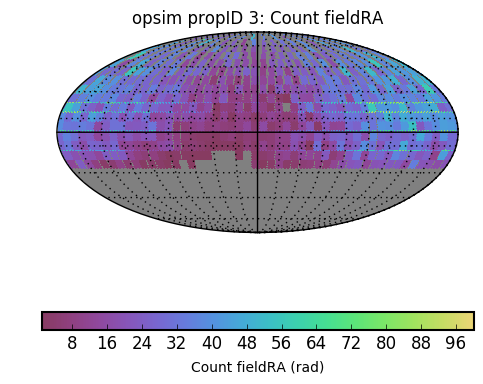

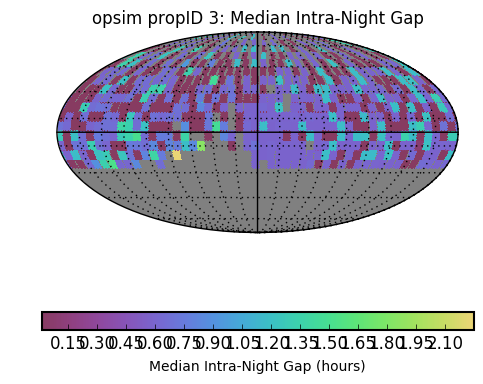

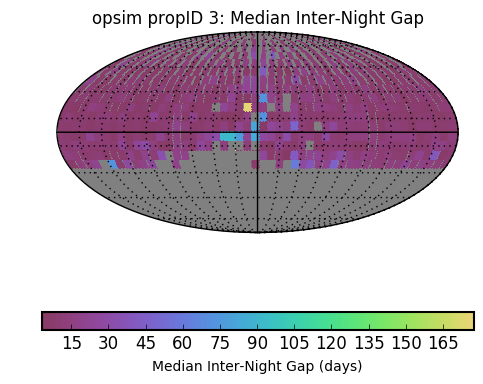

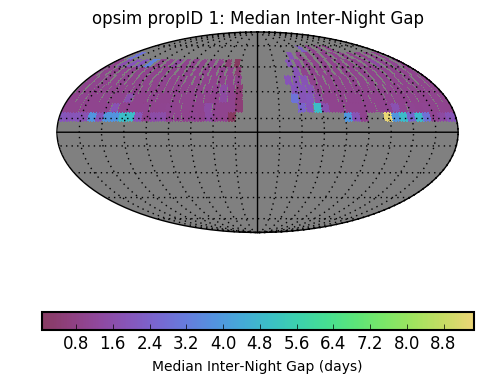

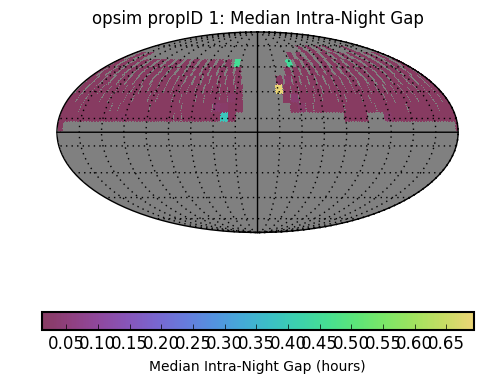

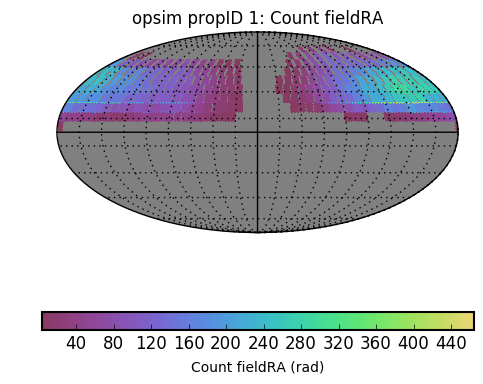

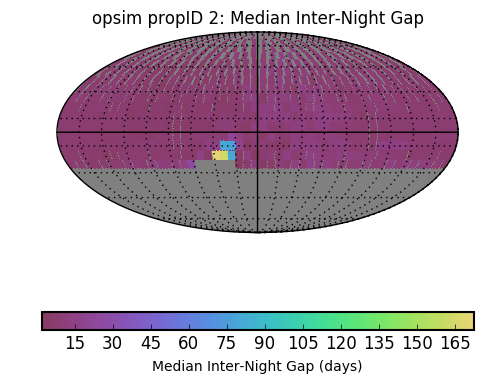

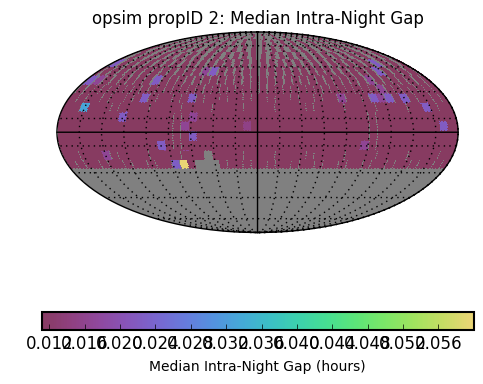

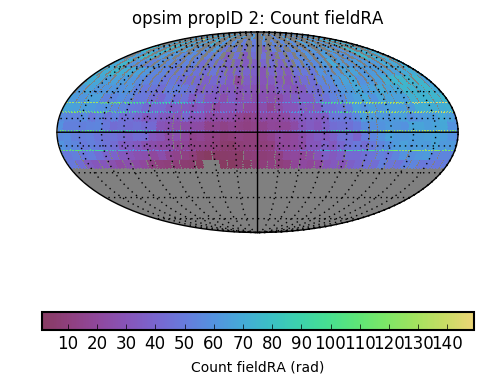

In [12]:
outDir = 'ZTF_test'
ztfDB = db.OpsimDatabase('../sims/one_year_sim_incomplete.db',
                        defaultdbTables={'Summary':['Summary','obsHistID']})
ztfDB.raColName = 'fieldRA'
ztfDB.decColName = 'fieldDec'

resultsDb = db.ResultsDb(outDir=outDir)

bgroup = metricBundles.MetricBundleGroup(bDict, ztfDB, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [13]:
for key in sorted(bDict):
    bDict[key].computeSummaryStats(resultsDb=resultsDb)
    print key, bDict[key].summaryValues

propID = '1'Count fieldRA {'25th%ile': 38.0, 'Rms': 82.333984867768834, '75th%ile': 169.0, 'Min': 3.0, 'Max': 464.0, 'Median': 97.0, 'Mean': 109.54020007410152}
propID = '1'Median Inter-Night Gap {'25th%ile': 1.0158035499989637, 'Rms': 0.93400845735822302, '75th%ile': 1.0677166000023135, 'Min': 0.04923189999681199, 'Max': 9.4534082499994838, 'Median': 1.0224312999998801, 'Mean': 1.3312316558683353}
propID = '1'Median Intra-Night Gap {'25th%ile': 0.011112000094726682, 'Rms': 0.05724338156047782, '75th%ile': 0.011112000094726682, 'Min': 0.011109599901828915, 'Max': 0.6926615999545902, 'Median': 0.011112000094726682, 'Mean': 0.017894185501147852}
propID = '2'Count fieldRA {'25th%ile': 30.0, 'Rms': 21.048755416512282, '75th%ile': 62.0, 'Min': 1.0, 'Max': 149.0, 'Median': 46.0, 'Mean': 45.220394843129021}
propID = '2'Median Inter-Night Gap {'25th%ile': 7.8554564499972912, 'Rms': 11.153999218905909, '75th%ile': 10.893798900004185, 'Min': 1.9775873999969917, 'Max': 172.33776840000064, 'Median